In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib as plt
import sklearn as sk

In [20]:
import seaborn as sns

In [5]:
df = pd.read_csv('../Destination_2015_2019.csv', low_memory=False)
df.rename(columns={'Unnamed: 0' : 'Id'}, inplace=True)
df.set_index(keys=['Id'], inplace=True)
df.head()

,No_disposition,Date_mutation,Nature_mutation,Valeur_fonciere,No_voie,Type_de_voie,Voie,Code_postal,Commune,Code_departement,...,5eme_lot,Surface_Carrez_du_5eme_lot,Nombre_de_lots,Code_type_local,Type_local,Surface_reelle_bati,Nombre_pieces_principales,Nature_culture,Nature_culture_speciale,Surface_terrain
Id,,,,,,,,,,,,,,,,,,,,,
0,1,2019-04-01,Vente,37220.0,26.0,RUE,DE MONTHOLON,1000.0,BOURG-EN-BRESSE,01,...,NaN,NaN,1,2.0,Appartement,20.0,1.0,NaN,NaN,NaN
1,1,2019-04-01,Vente,185100.0,22.0,RUE,GEN DELESTRAINT,1000.0,BOURG-EN-BRESSE,01,...,NaN,NaN,2,2.0,Appartement,62.0,3.0,NaN,NaN,NaN
2,1,2019-04-01,Vente,185100.0,22.0,RUE,GEN DELESTRAINT,1000.0,BOURG-EN-BRESSE,01,...,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
3,1,2019-08-01,Vente,209000.0,3.0,RUE,DES CHAMPAGNES,1160.0,PRIAY,01,...,NaN,NaN,0,1.0,Maison,90.0,4.0,S,NaN,940.0
4,1,2019-07-01,Vente,134900.0,5.0,LOT,LE BIOLAY,1370.0,SAINT-ETIENNE-DU-BOIS,01,...,NaN,NaN,0,1.0,Maison,101.0,5.0,S,NaN,490.0


In [8]:
df.shape

(14880473, 28)

In [12]:
df = df[df['No_disposition'] == 1]
df.drop(columns=['No_disposition' ], inplace=True)
df.shape

(13764742, 27)

In [13]:
df = df[df['Nature_mutation'] == 'Vente']
df.drop(columns=['Nature_mutation'], inplace=True)
df.shape

(12480780, 26)

In [14]:
df.columns

Index(['Date_mutation', 'Valeur_fonciere', 'No_voie', 'Type_de_voie', 'Voie',
       'Code_postal', 'Commune', 'Code_departement', '1er_lot',
       'Surface_Carrez_du_1er_lot', '2eme_lot', 'Surface_Carrez_du_2eme_lot',
       '3eme_lot', 'Surface_Carrez_du_3eme_lot', '4eme_lot',
       'Surface_Carrez_du_4eme_lot', '5eme_lot', 'Surface_Carrez_du_5eme_lot',
       'Nombre_de_lots', 'Code_type_local', 'Type_local',
       'Surface_reelle_bati', 'Nombre_pieces_principales', 'Nature_culture',
       'Nature_culture_speciale', 'Surface_terrain'],
      dtype='object')

In [15]:
df.drop(columns=['1er_lot', 'Surface_Carrez_du_1er_lot', '2eme_lot', 'Surface_Carrez_du_2eme_lot',
       '3eme_lot', 'Surface_Carrez_du_3eme_lot', '4eme_lot',
       'Surface_Carrez_du_4eme_lot', '5eme_lot', 'Surface_Carrez_du_5eme_lot',
       'Nombre_de_lots', 'Code_type_local'], inplace=True)
df.shape

(12480780, 14)

In [16]:
df.drop(columns=['Nature_culture', 'Nature_culture_speciale'], inplace=True)
df.shape

(12480780, 12)

In [17]:
df.head()

,Date_mutation,Valeur_fonciere,No_voie,Type_de_voie,Voie,Code_postal,Commune,Code_departement,Type_local,Surface_reelle_bati,Nombre_pieces_principales,Surface_terrain
Id,,,,,,,,,,,,
0,2019-04-01,37220.0,26.0,RUE,DE MONTHOLON,1000.0,BOURG-EN-BRESSE,01,Appartement,20.0,1.0,NaN
1,2019-04-01,185100.0,22.0,RUE,GEN DELESTRAINT,1000.0,BOURG-EN-BRESSE,01,Appartement,62.0,3.0,NaN
2,2019-04-01,185100.0,22.0,RUE,GEN DELESTRAINT,1000.0,BOURG-EN-BRESSE,01,Dépendance,0.0,0.0,NaN
3,2019-08-01,209000.0,3.0,RUE,DES CHAMPAGNES,1160.0,PRIAY,01,Maison,90.0,4.0,940.0
4,2019-07-01,134900.0,5.0,LOT,LE BIOLAY,1370.0,SAINT-ETIENNE-DU-BOIS,01,Maison,101.0,5.0,490.0


In [ ]:
df['Prix_par_m_bati'] = df.

<AxesSubplot:xlabel='Type_local', ylabel='count'>

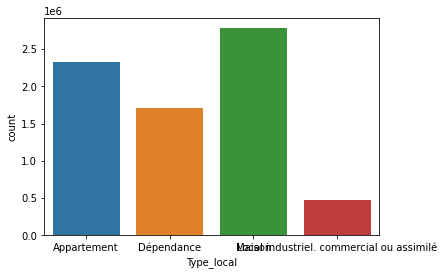

In [52]:
sns.countplot(df.Type_local)

In [34]:
df_grp = df.groupby(['Type_local'])['Valeur_fonciere'].sum()
df_grp = pd.DataFrame(df_grp)
df_grp.head()
# sns.barplot(x='Type_local', y='Valeur_fonciere', data=df)

,Valeur_fonciere
Type_local,
Appartement,5.807725e+12
Dépendance,2.408013e+12
Local industriel. commercial ou assimilé,1.234074e+12
Maison,1.193159e+12


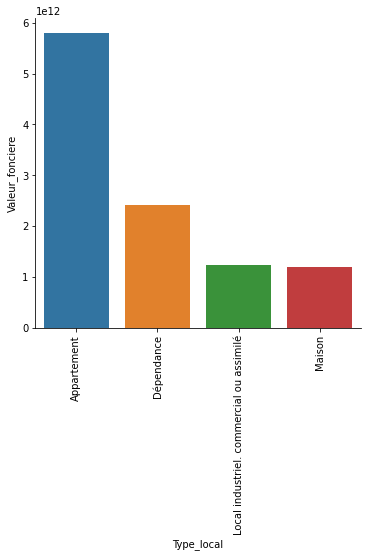

In [46]:
g = sns.catplot(x=df_grp.index, y='Valeur_fonciere', data = df_grp, kind='bar')
g.set_xticklabels(rotation=90)